In [111]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# read in data
df = pd.read_csv(r'C:/Users/Alley/Documents/DataScience_Portfolio/PythonStats/movies.csv')

In [2]:
# check file was read in
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [34]:
# check for missing data

for col in df.columns:
    pct_missing = (np.mean(df[col].isnull()))
    num_missing = df[col].isnull().sum()
    print(('{0} - {1:%} - {2}').format(col, pct_missing, num_missing))

name - 0.000000% - 0
rating - 1.004173% - 77
genre - 0.000000% - 0
year - 0.000000% - 0
released - 0.026082% - 2
score - 0.039124% - 3
votes - 0.039124% - 3
director - 0.000000% - 0
writer - 0.039124% - 3
star - 0.013041% - 1
country - 0.039124% - 3
budget - 28.312467% - 2171
gross - 2.464789% - 189
company - 0.221701% - 17
runtime - 0.052165% - 4


In [7]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [41]:
# change budget to integer

df['clean_budget'] = df['budget'].dropna().astype('int64')
df['clean_gross'] = df['gross'].dropna().astype('int64')

In [70]:
# year column is sometimes wrong, replace with correct year

df['year'] = df['released'].astype('str').str[-20:-16]

In [72]:
# check column was correctly replaced

print(df['year'].equals(df['clean_year']))

True


In [74]:
# sort movies by gross

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,clean_budget,clean_gross,clean_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,237000000.0,2.847246e+09,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,356000000.0,2.797501e+09,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,200000000.0,2.201647e+09,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,245000000.0,2.069522e+09,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,321000000.0,2.048360e+09,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,7000.0,NaN,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,NaN,NaN,2020
7665,Saving Mbango,NaN,Drama,"27,","April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,58750.0,NaN,"27,"
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,15000.0,NaN,2020


In [75]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,clean_budget,clean_gross,clean_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,19000000.0,46998772.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,4500000.0,58853106.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,18000000.0,538375067.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,3500000.0,83453539.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,6000000.0,39846344.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,7000.0,NaN,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,NaN,NaN,2020
7665,Saving Mbango,NaN,Drama,"27,","April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,58750.0,NaN,"27,"
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,15000.0,NaN,2020


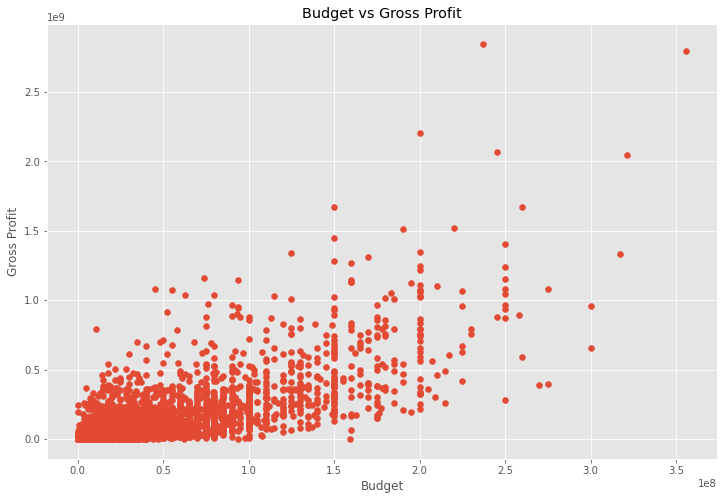

In [78]:
# scatter plot budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Profit')
plt.xlabel('Budget')
plt.ylabel('Gross Profit')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

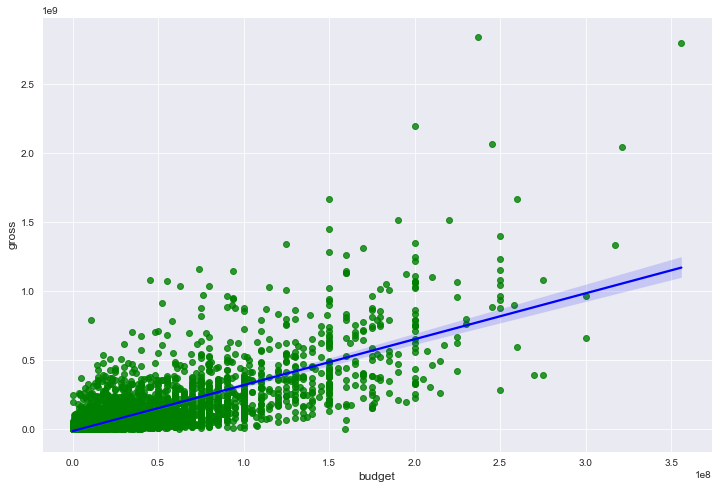

In [104]:
# plot budget vs gross using seaborn

sns.regplot(x='budget', 
            y='gross', 
            data=df,
            line_kws={'color': 'blue'},
            scatter_kws={'color': 'green'}
           )

In [105]:
df.corr() #pearson (default), kendall, spearman

,score,votes,budget,gross,runtime,clean_budget,clean_gross
score,1.000000,0.409182,0.076254,0.186258,0.399451,0.076254,0.186258
votes,0.409182,1.000000,0.442429,0.630757,0.309212,0.442429,0.630757
budget,0.076254,0.442429,1.000000,0.740395,0.320447,1.000000,0.740395
gross,0.186258,0.630757,0.740395,1.000000,0.245216,0.740395,1.000000
runtime,0.399451,0.309212,0.320447,0.245216,1.000000,0.320447,0.245216
clean_budget,0.076254,0.442429,1.000000,0.740395,0.320447,1.000000,0.740395
clean_gross,0.186258,0.630757,0.740395,1.000000,0.245216,0.740395,1.000000


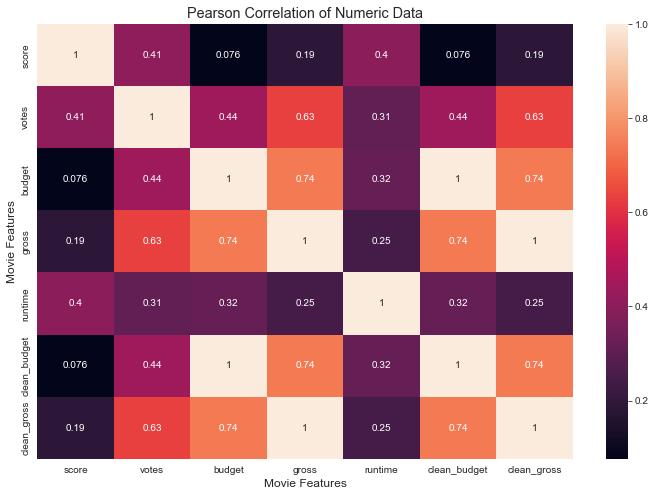

In [108]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Pearson Correlation of Numeric Data')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [109]:
# to look at correlation between company vs gross, start with coding the qualitative data

df_coded = df

for col_name in df_coded.columns:
    if(df_coded[col_name].dtype == 'object'):
        df_coded[col_name] = df_coded[col_name].astype('category')
        df_coded[col_name] = df_coded[col_name].cat.codes

df_coded

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,clean_budget,clean_gross,clean_year
0,6587,6,6,51,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,19000000.0,46998772.0,51
1,5573,6,1,51,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,4500000.0,58853106.0,51
2,5142,4,0,51,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,18000000.0,538375067.0,51
3,286,4,4,51,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,3500000.0,83453539.0,51
4,1027,6,4,51,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,6000000.0,39846344.0,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,92,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0,7000.0,NaN,92
7664,1678,-1,4,92,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0,NaN,NaN,92
7665,4717,-1,6,12,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN,58750.0,NaN,12
7666,2843,-1,6,92,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0,15000.0,NaN,92


In [118]:
# dropping duplicate columns
df_coded['budget'] = df_coded['clean_budget']
df_coded['gross'] = df_coded['clean_gross']

df_coded = df_coded.drop(['clean_budget', 'clean_gross', 'clean_year'], axis=1)

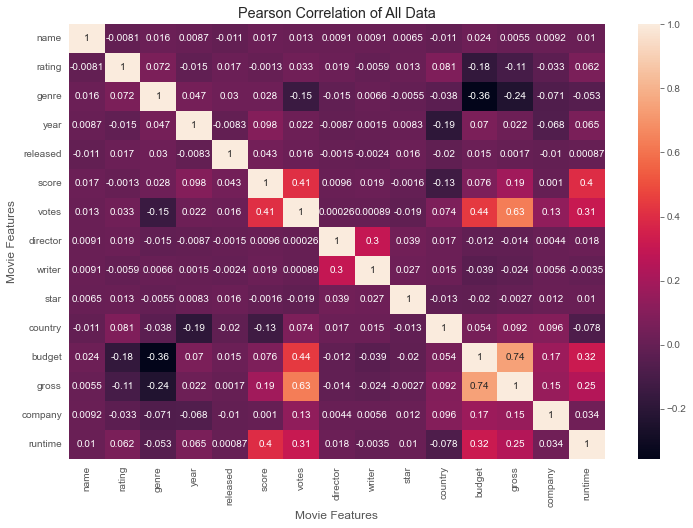

In [119]:
correlation_matrix = df_coded.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Pearson Correlation of All Data')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [127]:
correlation_matrix = df_coded.corr()

corr_pairs = correlation_matrix.unstack()
corr_pairs

# remove row limit to see all data
# pd.set_option('display.max_rows', None)

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.008671
          released   -0.011311
          score       0.017097
          votes       0.013088
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.023970
          gross       0.005533
          company     0.009211
          runtime     0.010392
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year       -0.015355
          released    0.016613
          score      -0.001314
          votes       0.033225
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.176002
          gross      -0.107339
          company    -0.032943
          runtime     0.062145
genre     name        0.016355
          rating      0.072423
        

In [131]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.356564
genre     budget     -0.356564
          gross      -0.235650
gross     genre      -0.235650
country   year       -0.192048
year      country    -0.192048
budget    rating     -0.176002
rating    budget     -0.176002
votes     genre      -0.145307
genre     votes      -0.145307
score     country    -0.133348
country   score      -0.133348
gross     rating     -0.107339
rating    gross      -0.107339
country   runtime    -0.078412
runtime   country    -0.078412
genre     company    -0.071067
company   genre      -0.071067
year      company    -0.067744
company   year       -0.067744
genre     runtime    -0.052711
runtime   genre      -0.052711
budget    writer     -0.039451
writer    budget     -0.039451
country   genre      -0.037615
genre     country    -0.037615
rating    company    -0.032943
company   rating     -0.032943
gross     writer     -0.023519
writer    gross      -0.023519
released  country    -0.020427
country   released   -0.020427
star    

In [135]:
highcorr = sorted_pairs[(sorted_pairs) > 0.5]
highcorr

votes     gross       0.630757
gross     votes       0.630757
          budget      0.740395
budget    gross       0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64